# Titanic Survival 

## 1. Problem

In this notebook, we aim to  **create a model to predict which passengers would survive in the Titanic crash based on passengers' features.** 

The data has been split into two groups: training and testing set. We will use the training set to build our machine learning model.

We are going to build a Logistic regression to classify whether a passenger survives (Survavil=1) or not (Survival=0).

### Performance Measure

Our performance measure will be **accuracy**, the fraction of correct predictions.


$$
\textrm{Accuracy} = \frac{\textrm{number of correct predictions}}{\textrm{number of predictions} }
$$

## 2. Getting the data 
You may obtain the train and test datasets from the repository using code from the following cell.

**NOTE** You may need to change the NOTEBOOK_ROOT variable to point to the directory into which you've cloned the repository.  On my machine, it is `~/Notebooks/NYU`.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.utils import shuffle



NOTEBOOK_ROOT = "~\Desktop\ML\ML_Spring_2019"
TITANIC_PATH = os.path.join( NOTEBOOK_ROOT, "external/jack-dies", "data")
train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv"))
train_data = train_data.iloc[np.random.permutation(len(train_data))]    #Shuffling the data

test_data  = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv"))

The training set contains 891 observations for each one of the 12 attributes. Note that some variables have missing values. **Our target variable is 'Survive', the other 11 variables are features that we'll use to classify.** 

## 3. Explore the data

Let's get a quick description of the training set to check variable types and number of non-null values.

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 375 to 571
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Correlation Matrix**

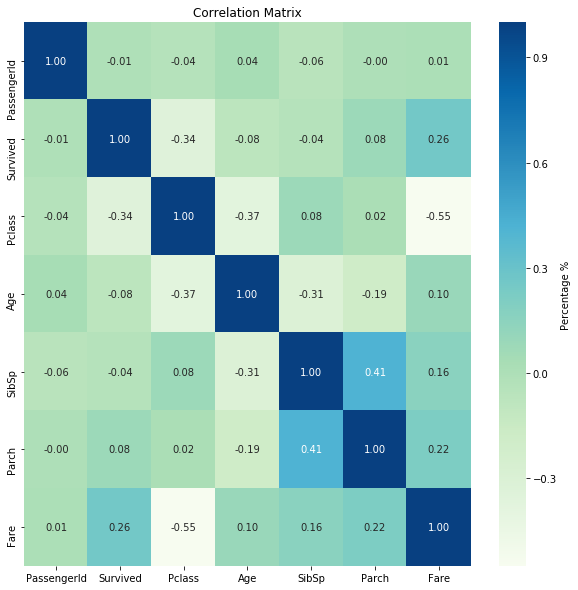

In [5]:
z,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap="GnBu",ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

The **correlation matrix confirms that the variable fare has the highest positive correlation with the target variable**, without considering the categorical variables. Also, we can see that the variable Parch and SibSp are positively correlated; we could create a new variable adding these two and get the number of members in a family.

### Charts for categorical features

For the variable "Fare" there are some people who paid more to get inside the ship. Therefore, **I decided to fix a threshold to the ticket price above 150**.

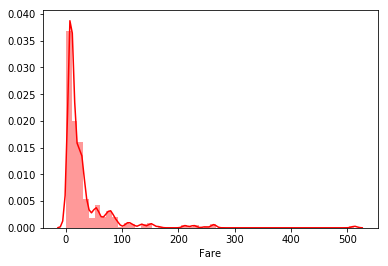

In [6]:
k= sns.distplot(train_data["Fare"] , color="red", label="Fare")

The following analysis indicates that Age, Sex, Embrked and PClass may be good predictors of survival. Particularly, **we can immediately see that young people between 20-30 survived in much higher proportions than older or younger people. So, it would be useful to analyze the variable age by groups.**

I created plots to compare visually those who survived vs those who died across different categorical variables.

(0, 80)

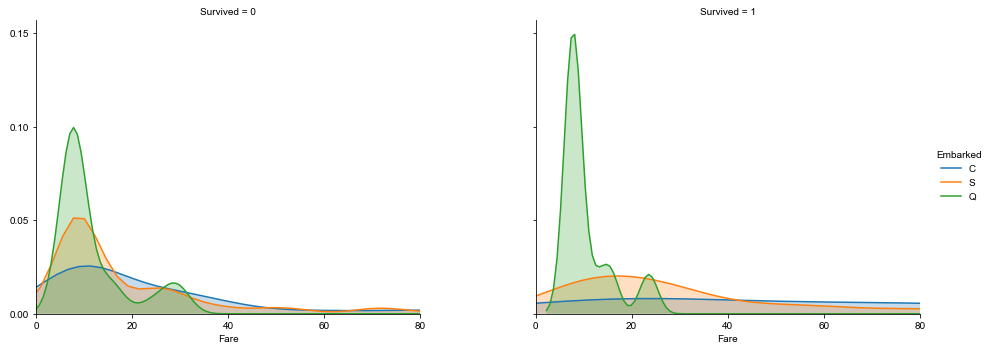

In [7]:
k = sns.FacetGrid(train_data, col="Survived", hue='Embarked', height=5, aspect = 1.3)
k.map(sns.kdeplot, "Fare", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
k.set(xlim=(0, train_data['Fare'].max()))
plt.xlim(0, 80)

The chart confirms that there is a greater percentage of survivors who embarked in the Queenstown port, paying a relatively cheap fare between 0 and 20. 

(0, 100)

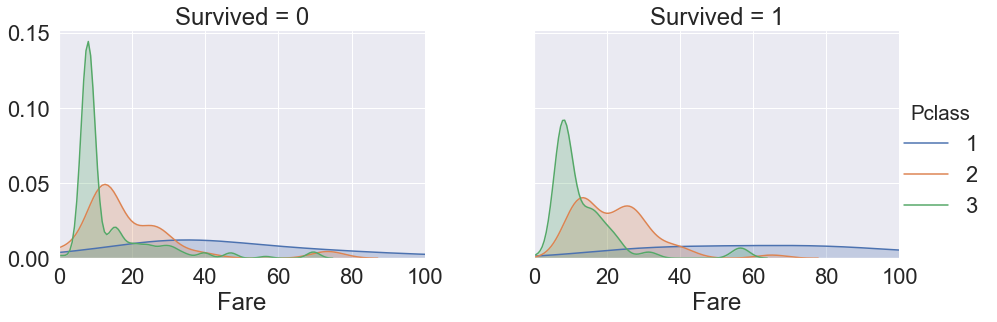

In [8]:
k = sns.FacetGrid(train_data, col="Survived", hue='Pclass', height=5, aspect = 1.3)
k.map(sns.kdeplot, "Fare", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
k.set(xlim=(0, train_data['Fare'].max()))
plt.xlim(0, 100)

Furthermore, people in the third class is more likely to not survive than other classes.

(0, 100)

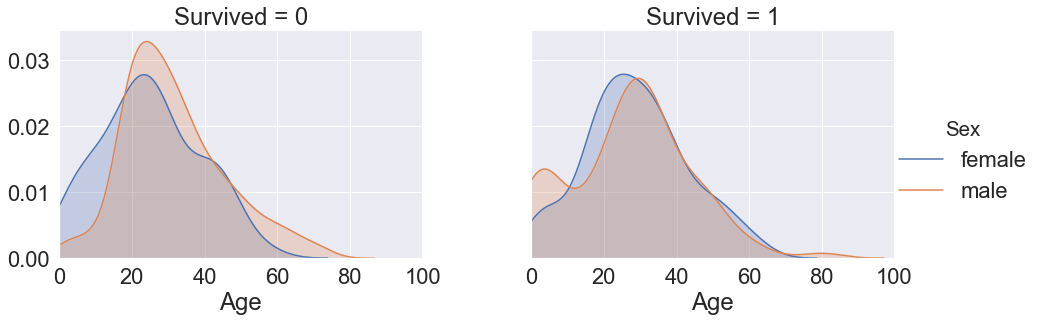

In [9]:
k = sns.FacetGrid(train_data, col="Survived", hue='Sex', height=5, aspect = 1.3)
k.map(sns.kdeplot, "Age", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
k.set(xlim=(0, train_data['Fare'].max()))
plt.xlim(0, 100)

(0, 100)

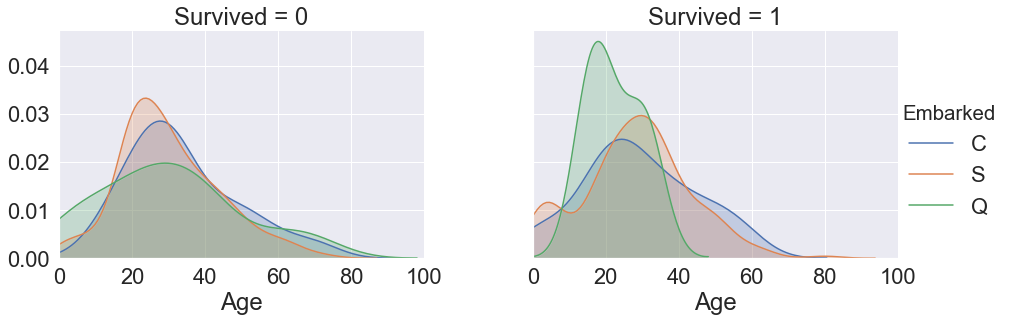

In [10]:
k = sns.FacetGrid(train_data, col="Survived", hue='Embarked', height=5, aspect = 1.3)
k.map(sns.kdeplot, "Age", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
k.set(xlim=(0, train_data['Fare'].max()))
plt.xlim(0, 100)

Additionally, **it is interesting to analyze the percentage of people who survived by age and sex. Women are more likely to survive**, and young people between 20-30 are more likely to die. **So it would be useful to group the variable Age into buckets or bins**.

In [11]:
def plot_cond( df, var, conds, ax, normalize=True):
    """
    Plot probability of a value in column var of DataFrame df, conditional on conditions expressed in conds
    
    Parameters
    ----------
    df: DataFrame
    var: String.  Name of column in df whose density we will plot
    conds: Dictionary
    - keys are Strings, which are names of columns in df
    - values are values that could be compared with column at the key
    
    
    """
    plot_data = df.copy()
    title_array = []
    
    for cond, val in conds.items():
        title_array.append( "{c}={v}".format(c=cond, v=val))
        plot_data = plot_data.loc[ plot_data.loc[:, cond] == val, : ]
        
        args = { "kind": "bar"}
        
    
    plot_data = plot_data.loc[:, var ]
    
    title = ", ".join(title_array)
    title = "Prob({v} | {t})".format(v=var, t=title)
    plot_data.value_counts(normalize=normalize).sort_index().plot(title=title, ax=ax, **args)
    
def plot_conds(df, specs):
    """
    Print multiple conditional plots using plot_cond
    
    Parameters
    -----------
    df: DataFrame
    specs: List. Each element of the list is a tuple (var, conds)
    -  each element of the list generates a call to plot_cond(df, var, conds)
    """
    num_specs = len(specs)
    ncols=3
    nrows = max(1,round(.4999 + num_specs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, num_specs*2.5))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_specs == 1:
        axes =np.array( [ axes ])
        
    for i, spec in enumerate(specs):
        if spec is None:
            continue
        (var, conds) = spec
        plot_cond(df, var, conds, ax=axes.flatten()[i])

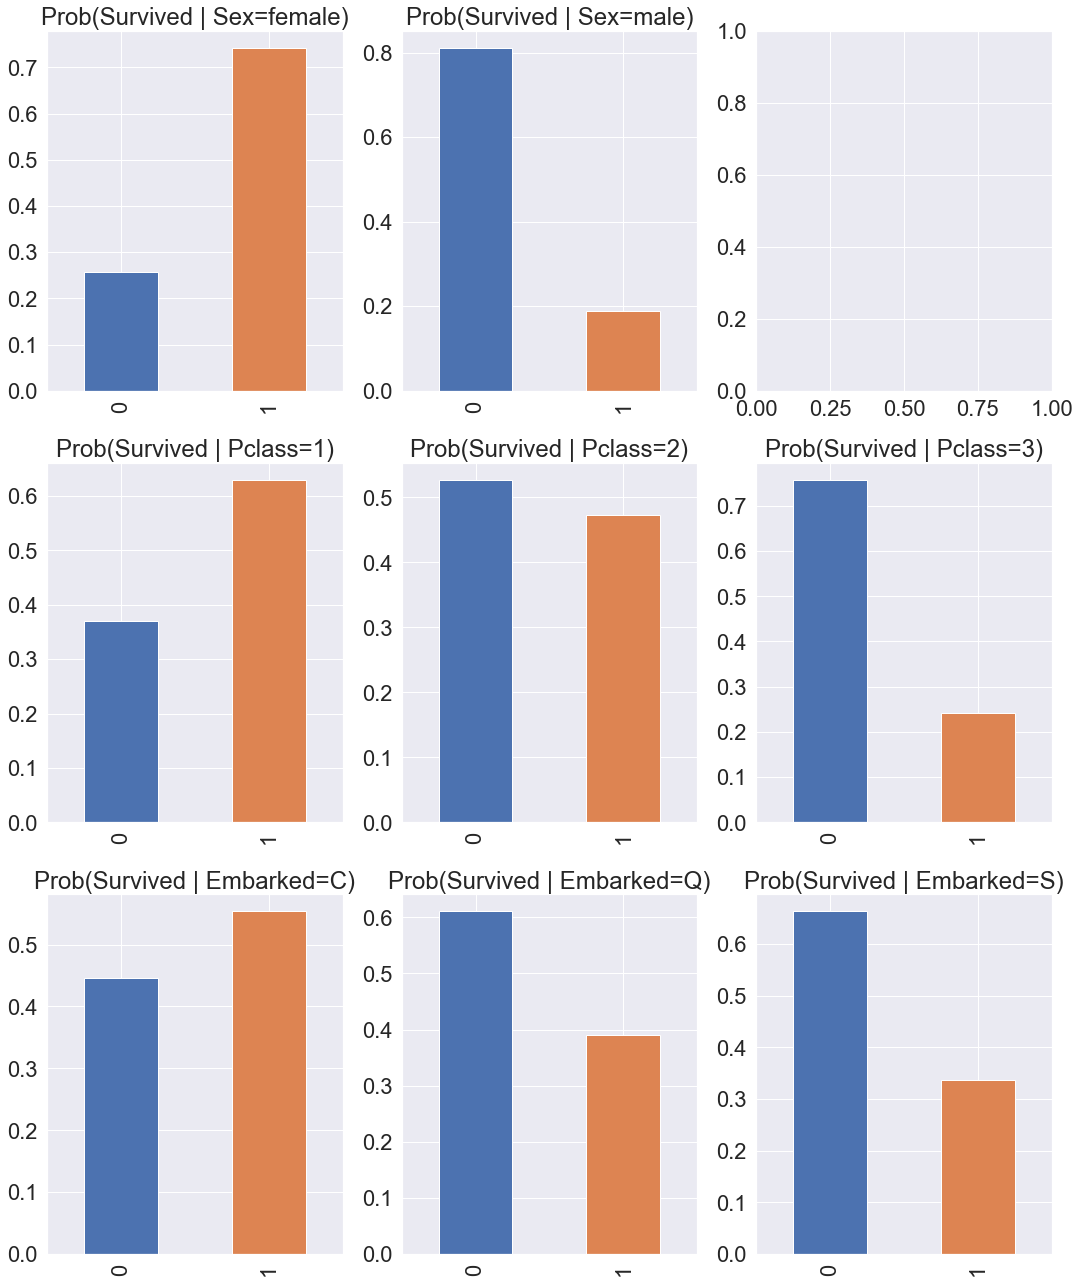

In [12]:
plot_conds(train_data, [ ("Survived", { "Sex": "female"}),
                         ("Survived", { "Sex": "male"}),
                         None,
                         ("Survived", { "Pclass": 1}),
                         ("Survived", { "Pclass": 2}),
                         ("Survived", { "Pclass": 3}),
                        
                         ("Survived", { "Embarked":"C"}),
                         ("Survived", { "Embarked":"Q"}),
                         ("Survived", { "Embarked":"S"}),
                       ]
          )

## 4. Prepare the Data

The variables we'll use in our model must be converted to numeric data. We have to encode all the categorical labels to column vectors with binary values. Additionally, missing values or NaNs in the dataset should be addressed by filling them up with a mean or interpolated values.

Note that one important feature of **Sklearn's Logistic Regression implementation is that it takes regularization into account**,  handling multicollinearity problems. This is the reason I didn't drop one column of each of my encoded categorical variables.

**My baseline model is the simplest possible model to compare my accuracy across other experiments. To improve my accuracy I can add or change the data attributes based on the performance of my baseline model.** 

**For experiment 2, I decided to group the Age (Age_Range_2) column into six categories:**

- 0-5 Infant
- 5-12 Child
- 12-18 Teeneger
- 18-35 Young adult
- 35-60 Adult
- +60 Senior

| Variables     | Baseline  | Experiment 1 | Experiment 2 | Extra Credit |
|---------------|-----------|--------------|--------------|--------------|
| Numerical     | .         | .            | .            | .            |
| 1             | FamilyMem | FamilyMem    | FamilyMem    | .            |
| 2             | Fare      | .            | Fare         | Fare         |
| 3             | Age       | Age          | .            | .            |
| Non-numerical | .         | .            | .            | .            |
| 1             | Sex       | Sex          | Sex          | Sex          |
| 2             | Pclass    | Pclass       | Pclass       | Age_Range_2  |
| 3             | Embarked  | Embarked     | .            | Embarked     |
| 4             | .         | Fare_1       | Age_Range_2  | Fam_Range_EC |


### Numeric pipeline

#### Process of transforming raw data into features
- I put a ceiling of 150 on the variable "Fare". The price is updated for everyone who paid above this quantity.
- I created new feature "FamiliyMem" by adding the variables "Parch" and "SibSp", indicating the size of the family that person was travelling with.
- The variable Age is bucket into groups: '<5','5-12','12-18','18-35','35-60','+60'.
- The variable Fare is bucket into groups: '<8','8-17','17-28','28-35','35-40','40-45', '45-55', '55-65', '65-75', '+75'


In [13]:
age_bins = [0,5,12,18,35,60,150]
age_labels = ['<5','5-12','12-18','18-35','35-60','+60']
Fare_bins = [0,8,17,28,35,40, 45, 55, 65, 75, 150]
Fare_labels = ['<8','8-17','17-28','28-35','35-40','40-45', '45-55', '55-65', '65-75', '+75']

#dummy_trd=pd.get_dummies(train_data['Pclass'])
#Fare_1=train_data['Fare']*dummy_trd.iloc[:,0]
#Fare_2=train_data['Fare']*dummy_trd.iloc[:,1]
#Fare_3=train_data['Fare']*dummy_trd.iloc[:,2]
#train_data['Fare_1'] = Fare_1
#train_data['Fare_2' ] =  Fare_2
#train_data['Fare_3' ] = Fare_3

for df in [train_data, test_data]:
    df.loc[df['Fare'] > 150, 'Fare'] = 150
    df['FamilyMem'] = df['Parch'] + df['SibSp'] 
    df['Fare_1'] = pd.cut(df['Fare'], bins=Fare_bins, labels=Fare_labels, include_lowest=True)
    df['AgeRange_2'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

#### Extra credit features

In [14]:
Fam_bins = [0,3,5,7,100]
Fam_labels = ['<1','1-2','2-4','4-6']

for df in [train_data, test_data]:
    df['Fam_Range_EC'] = pd.cut(df['FamilyMem'], bins=Fam_bins, labels=Fam_labels, include_lowest=True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMem,Fare_1,AgeRange_2,Fam_Range_EC
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C,1,+75,NaN,<1
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,45-55,+60,<1
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S,0,8-17,18-35,<1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,0,<8,35-60,<1
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,0,17-28,35-60,<1


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

    
from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

#Basline
num_features_bl = [ "FamilyMem", 'Age', 'Fare']

num_pipeline_bl = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_bl )),
        ("imputer", SimpleImputer(strategy="median")),
    ])

#Experiment 1
num_features_1 = ["FamilyMem", 'Age']

num_pipeline_1 = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_1 )),
        ("imputer", SimpleImputer(strategy="median")),
    ])

#Experiment 2
num_features_2 = [ "FamilyMem", "Fare"]

num_pipeline_2 = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_2 )),
        ("imputer", SimpleImputer(strategy="median")),
    ])

#Extra credit
######   The strategy is mean  #######
num_features_EC = ["Fare"]

num_pipeline_EC = Pipeline([
        ("select_numeric", DataFrameSelector( num_features_EC )),
        ("imputer", SimpleImputer(strategy="mean")),
    ])

### Non-numeric pipeline

In [17]:
from sklearn.preprocessing import OneHotEncoder 

#Baseline
cat_features_bl = ["Sex", "Pclass", "Embarked"]
cat_pipeline_bl = Pipeline([
        ("select_cat", DataFrameSelector( cat_features_bl )),
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#Experiment 1
cat_features_1 = ["Sex", "Pclass", "Embarked", "Fare_1"]
cat_pipeline_1 = Pipeline([
        ("select_cat", DataFrameSelector( cat_features_1 )),
        ("imputer", SimpleImputer(strategy = 'most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#Experiment 2
cat_features_2 = ["Sex", "Pclass", 'AgeRange_2']
cat_pipeline_2 = Pipeline([
        ("select_cat", DataFrameSelector( cat_features_2 )),
        ("imputer", SimpleImputer(strategy = 'most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#Extra credit

cat_features_EC = ["Sex", "Embarked",'AgeRange_2', 'Fam_Range_EC']
cat_pipeline_EC = Pipeline([
        ("select_cat", DataFrameSelector( cat_features_EC )),
        ("imputer", SimpleImputer(strategy = 'most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])


In [18]:
cat_pipeline_bl.fit_transform(train_data);
cat_pipeline_1.fit_transform(train_data);
cat_pipeline_2.fit_transform(train_data);
cat_pipeline_EC.fit_transform(train_data);

#### Union pipeline: both numeric and non-numeric pipelines together

In [19]:
from sklearn.pipeline import FeatureUnion
#Baseline
preprocess_pipeline_bl = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_bl),
        ("cat_pipeline", cat_pipeline_bl),
    ])

#Experiment 1
preprocess_pipeline_1 = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_1),
        ("cat_pipeline", cat_pipeline_1),
    ])

#Experiment 2
preprocess_pipeline_2 = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_2),
        ("cat_pipeline", cat_pipeline_2),
    ])


#Extra Credit
preprocess_pipeline_EC = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline_EC),
        ("cat_pipeline", cat_pipeline_EC),
    ])

### Baseline

In [20]:
X_train_bl = preprocess_pipeline_bl.fit_transform(train_data)
X_train_bl.shape

(891, 11)

In [21]:
X_train_bl

array([[ 1.    , 28.    , 82.1708, ...,  1.    ,  0.    ,  0.    ],
       [ 0.    , 71.    , 49.5042, ...,  1.    ,  0.    ,  0.    ],
       [ 0.    , 19.    , 10.1708, ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 0.    , 28.    ,  7.55  , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    , 28.    , 56.4958, ...,  0.    ,  0.    ,  1.    ],
       [ 2.    , 53.    , 51.4792, ...,  0.    ,  0.    ,  1.    ]])

In [22]:
np.isnan(X_train_bl).any()

False

In [23]:
all_features = num_features_bl.copy()
all_features.extend(cat_features_bl)
train_data.loc[:, all_features ].head()

,FamilyMem,Age,Fare,Sex,Pclass,Embarked
375,1,NaN,82.1708,female,1,C
493,0,71.0,49.5042,male,1,C
687,0,19.0,10.1708,male,3,S
597,0,49.0,0.0000,male,3,S
512,0,36.0,26.2875,male,1,S


### Experiment 1

In [24]:
X_train_1 = preprocess_pipeline_1.fit_transform(train_data)
X_train_1.shape

(891, 20)

In [25]:
X_train_1

array([[ 1., 28.,  1., ...,  0.,  0.,  0.],
       [ 0., 71.,  0., ...,  0.,  0.,  0.],
       [ 0., 19.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0., 28.,  0., ...,  0.,  0.,  1.],
       [ 0., 28.,  0., ...,  0.,  0.,  0.],
       [ 2., 53.,  1., ...,  0.,  0.,  0.]])

In [26]:
np.isnan(X_train_1).any()

False

In [27]:
all_features = num_features_1.copy()
all_features.extend(cat_features_1)
train_data.loc[:, all_features].head(20)

,FamilyMem,Age,Sex,Pclass,Embarked,Fare_1
375,1,NaN,female,1,C,+75
493,0,71.0,male,1,C,45-55
687,0,19.0,male,3,S,8-17
597,0,49.0,male,3,S,<8
512,0,36.0,male,1,S,17-28
27,5,19.0,male,1,S,+75
349,0,42.0,male,3,S,8-17
487,0,58.0,male,1,C,28-35
268,1,58.0,female,1,S,+75
94,0,59.0,male,3,S,<8


### Experiment 2

In [28]:
X_train_2 = preprocess_pipeline_2.fit_transform(train_data)
X_train_2.shape

(891, 13)

In [29]:
X_train_2

array([[ 1.    , 82.1708,  1.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , 49.5042,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , 10.1708,  0.    , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  7.55  ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , 56.4958,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 2.    , 51.4792,  1.    , ...,  1.    ,  0.    ,  0.    ]])

In [30]:
np.isnan(X_train_2).any()

False

In [31]:
all_features = num_features_2.copy()
all_features.extend(cat_features_2)
train_data.loc[:, all_features].head()

,FamilyMem,Fare,Sex,Pclass,AgeRange_2
375,1,82.1708,female,1,NaN
493,0,49.5042,male,1,+60
687,0,10.1708,male,3,18-35
597,0,0.0000,male,3,35-60
512,0,26.2875,male,1,35-60


### Extra credit

In [32]:
X_train_EC = preprocess_pipeline_EC.fit_transform(train_data)
X_train_EC.shape

(891, 16)

In [33]:
np.set_printoptions(threshold=np.inf)
X_train_EC

array([[ 82.1708,   1.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [ 49.5042,   0.    ,   1.    ,   1.    ,   0.    ,   0.    ,
          1.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [ 10.1708,   0.    ,   1.    ,   0.    ,   0.    ,   1.    ,
          0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   1.    ,
          0.    ,   0.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [ 26.2875,   0.    ,   1.    ,   0.    ,   0.    ,   1.    ,
          0.    ,   0.    ,   0.    ,   1.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [150.    ,   0.    ,   1.    ,   0.    ,   0.    ,   1.    ,
       

**There isn't need to drop the first colum of each one of the categorical variable to avoid the dummy trap**

In [34]:
# Dropping the first colum of each one of the categorical variable to avoid the dummy trap
# idx_to_delete = [2,4,7,10]
# indices = [i for i in range(X_train.shape[-1]) if i not in idx_to_delete]
# X_train=X_train[:, indices]
# X_train.shape

## 5. Select a Model 

We'll use Logistic Regression

$$ P(y=1 | x_1, x_2, ... , x_n) $$ 

We will use the Linear regression equation to produce a "score" $s$ (where a higher score implies a higher probablility of Survival).  

$$ s = \Theta^T \cdot x $$ 
This score will be converted into a probability using the *sigmoid* function

$$
\sigma(s)  ={1 \over { 1 + e^{-s}} }
$$


**Experiments:**


| Variables     | Baseline  | Experiment 1 | Experiment 2 | Extra Credit |
|---------------|-----------|--------------|--------------|--------------|
| Numerical     | .         | .            | .            | .            |
| 1             | FamilyMem | FamilyMem    | FamilyMem    | .            |
| 2             | Fare      | .            | Fare         | Fare         |
| 3             | Age       | Age          | .            | .            |
| Non-numerical | .         | .            | .            | .            |
| 1             | Sex       | Sex          | Sex          | Sex          |
| 2             | Pclass    | Pclass       | Pclass       | Age_Range_2  |
| 3             | Embarked  | Embarked     | .            | Embarked     |
| 4             | .         | Fare_1       | Age_Range_2  | Fam_Range_EC |




In [35]:
y_train = train_data["Survived"]

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, preprocessing, model_selection 

logistic_clf = linear_model.LogisticRegression(solver='liblinear')

## 6. Present your solution

The most useful machine learning models include numerical features divided by ranges. In this case, **converting the variable "Age" into a categorical variable by dividing it into intervals achieved the highest average accuracy.** The relationship between target variable and predictor is not simple, but we can see that in some variable ranges more passengers survived. 

Additionally, it is important to select the most relevant features to reduce noise and overfitting. Experiment number 2 and "Extra Credit" have 5 variables, the other 2 experiments have 6 variables.


|.         | Baseline  | Experiment 1      | Experiment 2 | Extra Credit |
|---------------|-----------|--------------|--------------|--------------|
| Accuracy      | 0.79802   | 0.79916      |0.81033       | 0.81144      |


In [37]:
# Baseline
X_train_bl = preprocess_pipeline_bl.fit_transform(train_data)
logistic_clf.fit(X_train_bl, y_train)
y_pred_bl = logistic_clf.predict(X_train_bl)

Score_Baseline = cross_val_score(logistic_clf, X_train_bl, y_train, cv=5).mean()

#Experiment 1
X_train_1 = preprocess_pipeline_1.fit_transform(train_data)
E1=logistic_clf.fit(X_train_1, y_train)
y_pred_1 = logistic_clf.predict(X_train_1)
Score_1 = cross_val_score(logistic_clf, X_train_1, y_train, cv=5).mean()

#Experiment 2
X_train_2 = preprocess_pipeline_2.fit_transform(train_data)
E2=logistic_clf.fit(X_train_2, y_train)
y_pred_2 = logistic_clf.predict(X_train_2)
Score_2 = cross_val_score(logistic_clf, X_train_2, y_train, cv=5).mean()

#Extra Credit
X_train_EC = preprocess_pipeline_EC.fit_transform(train_data)
EC=logistic_clf.fit(X_train_EC, y_train)
y_pred_EC = logistic_clf.predict(X_train_EC)
Score_EC = cross_val_score(logistic_clf, X_train_EC, y_train, cv=5).mean()


print("Score of Baseline Model: {}".format(Score_Baseline))

print("Score of Experiment 1: {}".format(Score_1))

print("Score of Experiment 2: {}".format(Score_2))

print("Score of Extra Credit: {}".format(Score_EC))

Score of Baseline Model: 0.8014101419717164
Score of Experiment 1: 0.7991376298989961
Score of Experiment 2: 0.8092438542343802
Score of Extra Credit: 0.8170586643601097


### Confusion Matrix

**There is a trade-off between the number of TP and TN, as accuracy increases the number of TP increases, but the number of TN decreases. Overall, the experiment "Extra Credit" makes a better job classifying.** 

- Experiment 1 classifies the number of true positives as better as Experiment 2.
- Experiment 2 classifies the highest number of true negatives.
- Experiment "Extra Credit" classifies the highest number of true positives.



| .              | Baseline | Experiment 1 | Experiment 2 | Extra Credit |
|----------------|----------|--------------|--------------|--------------|
| True Negatives | 480      | 475          | 485          | 479          |
| True Positives | 238      | 242          | 242          | 250          |

In [38]:
confusion_mat_bl = metrics.confusion_matrix(y_train, y_pred_bl)

confusion_mat_1 = metrics.confusion_matrix(y_train, y_pred_1)

confusion_mat_2 = metrics.confusion_matrix(y_train, y_pred_2)

In [39]:
# %load mnist_plot_confusion.py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


**Baseline**

Confusion matrix, without normalization


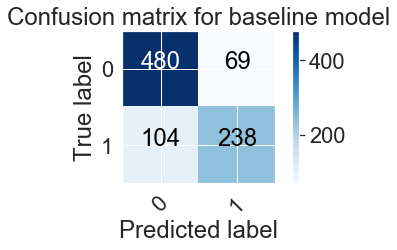

In [40]:
plot_confusion_matrix(confusion_mat_bl, range(2), normalize=False,  title='Confusion matrix for baseline model')

Normalized confusion matrix


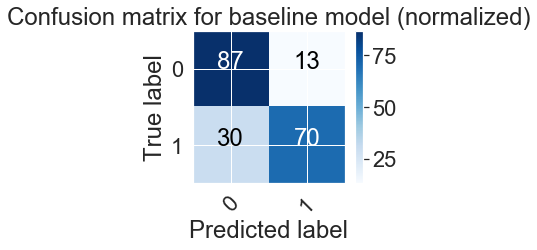

In [41]:
plot_confusion_matrix(confusion_mat_bl, range(2), normalize=True,  title='Confusion matrix for baseline model (normalized)')

**Experiment 1**

Confusion matrix, without normalization


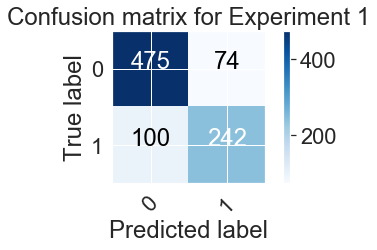

In [42]:
plot_confusion_matrix(confusion_mat_1, range(2), normalize=False,  title='Confusion matrix for Experiment 1')

Normalized confusion matrix


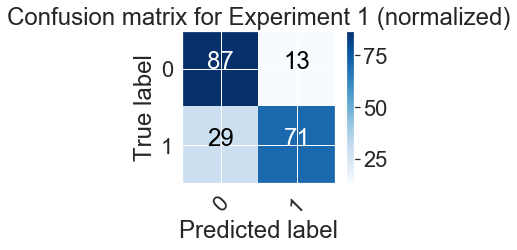

In [43]:
plot_confusion_matrix(confusion_mat_1, range(2), normalize=True,  title='Confusion matrix for Experiment 1 (normalized)')

**Experiment 2**

Confusion matrix, without normalization


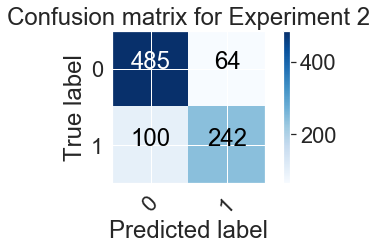

In [44]:
plot_confusion_matrix(confusion_mat_2, range(2), normalize=False,  title='Confusion matrix for Experiment 2')

Normalized confusion matrix


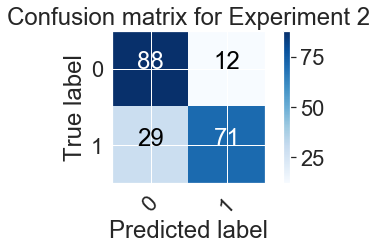

In [45]:
plot_confusion_matrix(confusion_mat_2, range(2), normalize=True,  title='Confusion matrix for Experiment 2')

## Mis-classified as Surviving (False Positive)

In [46]:
yms=np.where(y_train==0)
yms=[item.tolist() for item in yms][0]

**Experiment 1**

In [47]:
y_1=np.where(y_pred_1==1)
y_1=[item.tolist() for item in y_1][0]

Misclassified_Survive_1=set(yms).intersection(y_1)

L=len(Misclassified_Survive_1)
print("Number of misclassified survivors in Experiment 1: {}".format(L))
Misclassified_Survive_1

Number of misclassified survivors in Experiment 1: 74


{15,
 23,
 32,
 69,
 77,
 88,
 89,
 102,
 113,
 115,
 123,
 137,
 138,
 156,
 157,
 158,
 179,
 188,
 199,
 209,
 214,
 225,
 250,
 266,
 270,
 281,
 302,
 343,
 348,
 375,
 379,
 381,
 405,
 410,
 439,
 441,
 456,
 462,
 463,
 470,
 486,
 491,
 497,
 561,
 588,
 600,
 602,
 615,
 616,
 634,
 638,
 654,
 665,
 667,
 672,
 677,
 684,
 708,
 727,
 732,
 736,
 747,
 750,
 752,
 781,
 798,
 802,
 812,
 816,
 853,
 854,
 872,
 873,
 875}

**Experiment 2**

In [48]:
y_2=np.where(y_pred_2==1)
y_2=[item.tolist() for item in y_2][0]

Misclassified_Survive_2=set(yms).intersection(y_2)

L=len(Misclassified_Survive_2)
print("Number of misclassified survivors in Experiment 2: {}".format(L))
Misclassified_Survive_2

Number of misclassified survivors in Experiment 2: 64


{23,
 32,
 69,
 77,
 88,
 89,
 102,
 113,
 115,
 137,
 138,
 157,
 158,
 179,
 188,
 209,
 214,
 225,
 250,
 266,
 270,
 281,
 302,
 348,
 375,
 379,
 381,
 405,
 410,
 456,
 462,
 463,
 470,
 491,
 497,
 508,
 561,
 566,
 588,
 600,
 616,
 620,
 631,
 634,
 638,
 654,
 665,
 667,
 672,
 677,
 684,
 708,
 727,
 732,
 736,
 747,
 750,
 802,
 812,
 853,
 854,
 872,
 873,
 875}

## Mis-classified as Not Surviving (False Negative)

In [49]:
ymns=np.where(y_train==1)
ymns=[item.tolist() for item in ymns][0]

**Experiment 1**

In [50]:
y_1=np.where(y_pred_1==0)
y_1=[item.tolist() for item in y_1][0]

Misclassified_Not_Survive_1=set(ymns).intersection(y_1)

L=len(Misclassified_Not_Survive_1)
print("Number of mis-classified survivors in experiment 1: {}".format(L))
Misclassified_Not_Survive_1

Number of mis-classified survivors in experiment 1: 100


{4,
 16,
 20,
 21,
 24,
 41,
 42,
 48,
 49,
 54,
 58,
 66,
 68,
 71,
 79,
 85,
 90,
 91,
 101,
 122,
 126,
 129,
 144,
 151,
 154,
 161,
 168,
 171,
 174,
 178,
 182,
 223,
 229,
 241,
 246,
 267,
 278,
 288,
 309,
 329,
 331,
 342,
 356,
 357,
 363,
 397,
 407,
 414,
 428,
 437,
 442,
 443,
 445,
 447,
 455,
 461,
 471,
 481,
 483,
 499,
 500,
 532,
 548,
 552,
 554,
 562,
 563,
 567,
 569,
 570,
 575,
 594,
 608,
 613,
 617,
 625,
 652,
 658,
 661,
 669,
 671,
 683,
 693,
 717,
 738,
 745,
 768,
 771,
 773,
 775,
 783,
 796,
 799,
 805,
 809,
 810,
 817,
 833,
 859,
 879}

**Experiment 2**

In [51]:
y_2=np.where(y_pred_2==0)
y_2=[item.tolist() for item in y_2][0]

Misclassified_Not_Survive_2=set(ymns).intersection(y_2)

L=len(Misclassified_Not_Survive_2)
print("Number of misclassified survivors in experiment 2: {}".format(L))
Misclassified_Not_Survive_2

Number of misclassified survivors in experiment 2: 100


{4,
 16,
 20,
 24,
 41,
 42,
 46,
 49,
 54,
 58,
 66,
 71,
 79,
 85,
 90,
 91,
 101,
 105,
 122,
 126,
 144,
 151,
 154,
 161,
 168,
 171,
 178,
 182,
 215,
 223,
 229,
 241,
 246,
 267,
 278,
 288,
 309,
 317,
 329,
 331,
 333,
 342,
 346,
 356,
 357,
 407,
 414,
 437,
 442,
 443,
 445,
 455,
 461,
 464,
 471,
 483,
 500,
 526,
 532,
 548,
 552,
 554,
 562,
 563,
 567,
 569,
 570,
 575,
 594,
 608,
 613,
 617,
 625,
 652,
 658,
 661,
 669,
 671,
 683,
 693,
 717,
 735,
 738,
 745,
 768,
 771,
 773,
 775,
 783,
 796,
 799,
 805,
 809,
 810,
 815,
 817,
 833,
 855,
 859,
 879}

## Extra Credit Confusion Matrix

Confusion matrix, without normalization


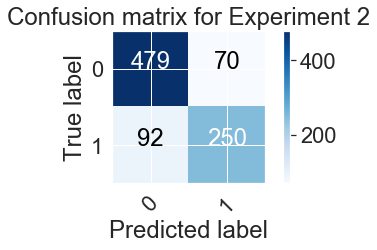

In [52]:
confusion_mat_EC = metrics.confusion_matrix(y_train, y_pred_EC)
plot_confusion_matrix(confusion_mat_EC, range(2), normalize=False,  title='Confusion matrix for Experiment 2')

Normalized confusion matrix


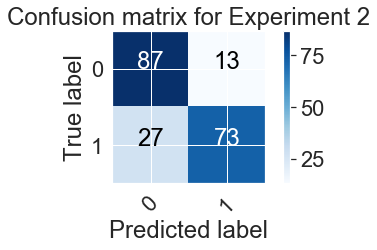

In [53]:
plot_confusion_matrix(confusion_mat_EC, range(2), normalize=True,  title='Confusion matrix for Experiment 2')

In [54]:
print("Confusion matrix shape ('Extra Credit'): ", confusion_mat_EC.shape)

# Compute recall by hand
for i in range(0,2):
    # True positives are on the diagonal
    TP = confusion_mat_EC[i,i]
    
    # False positives
    # Column i contains the observations that were classified (correctly or incorrectly) as i
    FP =np.sum(confusion_mat_EC, axis=0)[i] -TP
    
    num_true_i = np.sum(confusion_mat_EC, axis=1)[i]
    num_classified_i = np.sum(confusion_mat_EC, axis=0)[i]
    
    recall    = TP/num_true_i
    precision = TP/num_classified_i
    
    print("{i}: precision {p:3.2f}, recall {r:3.2f}".format(i=i, r=recall, p=precision) )

Confusion matrix shape ('Extra Credit'):  (2, 2)
0: precision 0.84, recall 0.87
1: precision 0.78, recall 0.73
